In [1]:
import numpy as np
import subprocess
import os

# FUNCTIONS

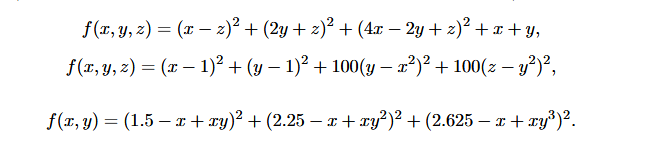

In [2]:
def f1(x, y, z):
    return (x - z) ** 2 + (2*y + z) ** 2 + (4*x -2*y + z) ** 2 + x + y

#min: -19/96 at [-1/6, -11/48, 1/6]

def f2(x, y, z):
    return ((x - 1) ** 2) + ((y - 1) ** 2) + 100*((y - (x ** 2)) ** 2) + 100*((z - (y ** 2)) ** 2)

#min: 0 at [1, 1, 1]

def f3(x, y):
    return (1.5 - x + x*y) ** 2 + (2.25 - x + x*(y ** 2)) ** 2 + (2.625 - x + x*(y ** 3)) ** 2

#min: 0 at [3, 0.5]


def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def quad3d(x, y, z):
    return (x - 1)**2 + (y - 2)**2 + (z + 1)**2

env = os.environ.copy()
env["PATH"] += r";C:\msys64\usr\bin"

def blackbox1(x, y, z):
    result = subprocess.run(
        ["./hw4_1_executables/hw4_1_win.exe", "63240458", "1", f"{x}", f"{y}", f"{z}"],  # command and args
        capture_output=True,    # capture stdout and stderr
        text=True,              # get output as string (not bytes)
        env=env
    )

    return(float(result.stdout))

def blackbox2(x, y, z):
    result = subprocess.run(
        ["./hw4_1_executables/hw4_1_win.exe", "63240458", "2", f"{x}", f"{y}", f"{z}"],  # command and args
        capture_output=True,    # capture stdout and stderr
        text=True,              # get output as string (not bytes)
        env=env
    )

    return(float(result.stdout))

def blackbox3(x, y, z):
    result = subprocess.run(
        ["./hw4_1_executables/hw4_1_win.exe", "63240458", "3", f"{x}", f"{y}", f"{z}"],  # command and args
        capture_output=True,    # capture stdout and stderr
        text=True,              # get output as string (not bytes)
        env=env
    )

    return(float(result.stdout))

# 2D NELDER MEAD

I will first implement only the 2 dimensional version in order to try to figure out the core logics.

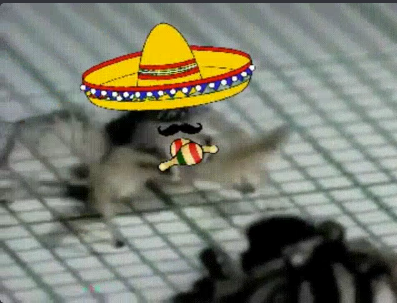

In [120]:
def nelder_mead_2d(v1, v2, v3, f, MAX_ITERATIONS=1000, EPS=1e-6):

    points = np.array([v1, v2, v3], dtype=np.float32) #we learned the hard way why setting the correct data type is crucial for the workings of this algorithm.
    zs = np.array([f(*point) for point in points])
    counter = 0

    for _ in range(MAX_ITERATIONS):
        sorted_indices = np.argsort(zs)

        zs[:] = zs[sorted_indices]
        points[:] = points[sorted_indices]
        best = points[0]
        good = points[1]
        worst = points[2]

        eps = 1e-8

        max_norm = np.max([np.linalg.norm(best - good),
                           np.linalg.norm(best - worst)])

        if np.max(np.abs(zs - zs[0])) < EPS and max_norm < EPS:
            # print(points)
            print(f"Nelder Mead converged after {counter} steps!")
            return(f(*best), best)

        #Sanity check
        # print(best, f(*best))
        # print(good, f(*good))
        # print(worst, f(*worst))
        # print("--------------------------------------")

        M = (best + good) / 2
        R = worst + 2 * (M - worst)
        E = worst + 3 * (M - worst)
        # print(M, R, E)

        yr = f(*R)
        ye = f(*E)

        if yr < zs[0]:
            if ye < yr:
                next_point = E
            else:
                next_point = R

            points[2] = next_point
            zs[2] = f(*next_point)
        
        elif yr < zs[1]:
            points[2] = R
            zs[2] = yr
        
        elif yr < zs[2]:
            oc = worst + 1.5 * (M - worst)
            yoc = f(*oc)
            if yoc < yr:
                points[2] = oc
                zs[2] = f(*oc)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = best + 0.5 * (points[i] - best)
                    zs[i] = f(*points[i])

        else:
            k = worst + 0.5 * (M - worst)
            yk = f(*k)
            if yk < zs[2]:
                points[2] = k
                zs[2] = f(*k)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = best + 0.5 * (points[i] - best)
                    zs[i] = f(*points[i])
        counter += 1
    return(f(*best), best)

# Also implementing 3D

In [123]:
def nelder_mead_3d(v1, v2, v3, v4, f, MAX_ITERATIONS=10000, EPS=1e-6):

    points = np.array([v1, v2, v3, v4], dtype=np.float32)
    zs = np.array([f(*point) for point in points])
    counter = 0

    #the loop should start here
    for i in range(MAX_ITERATIONS):
        sorted_indices = np.argsort(zs)

        zs[:] = zs[sorted_indices]
        points[:] = points[sorted_indices]
        best = points[0]
        good = points[2]
        worst = points[3]

        max_norm = np.max([np.linalg.norm(best - good),
                           np.linalg.norm(best - worst)])

        if np.max(np.abs(zs - zs[0])) < EPS and max_norm < EPS:
            # print(points)
            print(f"Nelder Mead converged after {counter} steps!")
            return(f(*best), best)

        #Sanity check
        # print(best, f(*best))
        # print(good, f(*good))
        # print(worst, f(*worst))

        M = np.mean(points[:-1], axis=0)
        R = 2*M - worst
        E = 2*R - M
        # print(M, R, E)

        yr = f(*R)
        ye = f(*E)

        if yr < zs[0]:
            if ye < yr:
                next_point = E
            else:
                next_point = R
            points[3] = next_point
            zs[3] = f(*next_point)
        
        elif yr < zs[2]:
            points[2] = R
            zs[2] = yr
        
        elif yr < zs[3]:
            oc = worst + 3/2 * (M - worst)
            yoc = f(*oc)
            if yoc < yr:
                points[3] = oc
                zs[3] = yoc
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])
                    zs[i] = f(*points[i])

        else:
            k = worst + 1/2 * (M - worst)
            yk = f(*k)
            if yk < zs[3]:
                points[3] = k
                zs[3] = f(*k)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])
                    zs[i] = f(*points[i])
        
        counter += 1

    return(points[0], zs[0])

# Testing function 1
Starting points are (0, 0, 0) and (1, 1, 0)

In [129]:
#Starting point (0, 0, 0)
r = 2.0

v1 = np.array([0.0, 0.0, 0.0])
v2 = np.array([0.0, 0.0, 0.0]) + np.array([r, 0.0, 0.0])
v3 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, r, 0.0])
v4 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, 0.0, r])

nelder_mead_3d(v1, v2, v3, v4, f1, EPS=1e-8)

(array([-0.16665888, -0.22907792,  0.16655417], dtype=float32),
 np.float32(-0.19791661))

In [128]:
#Starting point (1, 1, 0)
r = 1.0

v1 = np.array([1.0, 1.0, 0.0])
v2 = np.array([0.0, 0.0, 0.0]) + np.array([r, 0.0, 0.0])
v3 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, r, 0.0])
v4 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, 0.0, r])

nelder_mead_3d(v1, v2, v3, v4, f1, EPS=1e-8)

Nelder Mead converged after 1064 steps!


(np.float32(-0.095359534),
 array([-0.23167893, -0.30165672,  0.39162713], dtype=float32))

# Testing function 2
Starting points are (1.2, 1.2, 1.2) and (-1, 1.2, 1.2)

In [125]:
#Starting point (1.2, 1.2, 1.2)
r = 4.0

v1 = np.array([1.2, 1.2, 1.2])
v2 = np.array([0.0, 0.0, 0.0]) + np.array([r, 0.0, 0.0])
v3 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, r, 0.0])
v4 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, 0.0, r])

nelder_mead_3d(v1, v2, v3, v4, f2, EPS=1e-12)

Nelder Mead converged after 3153 steps!


(np.float32(5.4598104e-10),
 array([1.0000105, 1.0000207, 1.0000415], dtype=float32))

In [124]:
#Starting point (-1, 1.2, 1.2)
r = 5.0

v1 = np.array([-1.0, 1.2, 1.2])
v2 = np.array([0.0, 0.0, 0.0]) + np.array([r, 0.0, 0.0])
v3 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, r, 0.0])
v4 = np.array([0.0, 0.0, 0.0]) + np.array([0.0, 0.0, r])

nelder_mead_3d(v1, v2, v3, v4, f2, EPS=1e-8)

Nelder Mead converged after 106 steps!


(np.float32(3.3722148),
 array([-0.7956158 ,  0.64308465,  0.4033454 ], dtype=float32))

# Testing function 3
Starting poinrt are (1, 1) and (4.5, 4.5)

In [126]:
#Starting point (1, 1)
r = 1.0

test_point1 = np.array([1, 1])
test_point2 = test_point1 + np.array([r, 0])
test_point3 = test_point1 + np.array([0, r])

nelder_mead_2d(test_point1, test_point2, test_point3, f3)

Nelder Mead converged after 58 steps!


(np.float32(0.0), array([3. , 0.5], dtype=float32))

In [133]:
#Starting point (4.5, 4.5)
r = 2.0

test_point1 = np.array([4.5, 4.5])
test_point2 = test_point1 + np.array([r, 0])
test_point3 = test_point1 + np.array([0, r])

nelder_mead_2d(test_point1, test_point2, test_point3, f3)

Nelder Mead converged after 57 steps!


(np.float32(1.030287e-13), array([3.        , 0.49999994], dtype=float32))

# BLACKBOX FUNCTIONS

When running the method it occured to me that calculating the function value each time is not the best approach, so i will change the method to minimize function evaluations *smiley face*

0.854042360014854 [0.36448161 0.42364417 0.40423634]

In [ ]:
r = 1.0

v1 = np.array([0.0, 0.0, 0.0])
v2 = v1 + np.array([r, 0.0, 0.0])
v3 = v1 + np.array([0.0, r, 0.0])
v4 = v1 + np.array([0.0, 0.0, r])

nelder_mead_3d(v1, v2, v3, v4, blackbox1)   

KeyboardInterrupt: 